In [141]:
#Priblem Statement 
f=open("Problem_Statement(Airlines).txt")

In [142]:
f.read()



'Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. \nDraw the inferences from the clusters obtained.\n\nData Description:\n \nThe file EastWestAirlinescontains information on passengers who belong to an airlineâ€™s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers\n\nID --Unique ID\n\nBalance--Number of miles eligible for award travel\n\nQual_mile--Number of miles counted as qualifying for Topflight status\n\ncc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:\ncc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:\ncc3_miles -- Number of miles earned with Small Busin

In [143]:
Airlines=pd.read_excel("EastWestAirlines.xlsx",1)

<IPython.core.display.Javascript object>

In [144]:
Airlines.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [145]:
Airlines=Airlines.drop(columns="ID#")
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [146]:
Airlines.describe().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.0,3999.00,3999.00,3999.00,3999.00
mean,73601.33,144.11,2.06,1.01,1.01,17144.85,11.6,460.06,1.37,4118.56,0.37
std,100775.66,773.66,1.38,0.15,0.20,24150.97,9.6,1400.21,3.79,2065.13,0.48
min,0.00,0.00,1.00,1.00,1.00,0.00,0.0,0.00,0.00,2.00,0.00
25%,18527.50,0.00,1.00,1.00,1.00,1250.00,3.0,0.00,0.00,2330.00,0.00
50%,43097.00,0.00,1.00,1.00,1.00,7171.00,12.0,0.00,0.00,4096.00,0.00
75%,92404.00,0.00,3.00,1.00,1.00,23800.50,17.0,311.00,1.00,5790.50,1.00
max,1704838.00,11148.00,5.00,3.00,5.00,263685.00,86.0,30817.00,53.00,8296.00,1.00


In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [117]:
scaler.fit(Airlines)

StandardScaler()

In [149]:
Airlines_scale=scaler.fit_transform(Airlines)
Airlines_scale

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [150]:
Airlines_scale=pd.DataFrame(Airlines_scale)

<IPython.core.display.Javascript object>

In [151]:
Airlines_scale.columns=Airlines.columns

In [152]:
Airlines_scale

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [122]:
#elbow method to select k value 

In [153]:
from sklearn.cluster import KMeans

In [154]:
kmeans = KMeans( n_clusters = 3, init='k-means++')

In [155]:
kmeans.fit(Airlines_scale)

KMeans(n_clusters=3)

In [156]:
kmeans.inertia_


30899.58246603952

In [157]:
#elbow curve 
SSE=[]
for cluster in range(1,8):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(Airlines_scale)
    SSE.append(kmeans.inertia_)
    #SSE.append(cluster)


In [158]:
SSE

[43989.000000000095,
 35409.533633091225,
 30899.246824652128,
 27161.477324698524,
 24541.264811435103,
 21089.8148096513,
 18893.629987051]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

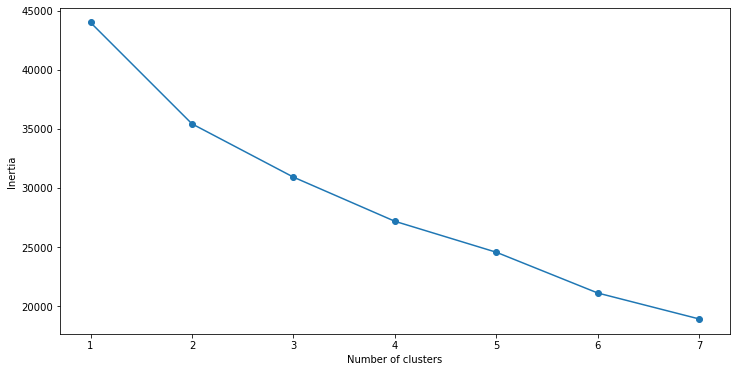

In [159]:
frame = pd.DataFrame({'K':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['K'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [160]:
kmeans_final = KMeans(n_clusters = 5, init='k-means++').fit(Airlines_scale)
    

In [161]:
pred=kmeans_final.predict(Airlines_scale)

In [162]:
kmeans_final.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [163]:
kmeans_final.cluster_centers_

array([[ 0.4448229 , -0.11171919,  1.21644262, -0.09824189,  0.13584492,
         0.96781528,  0.77337009, -0.07131031, -0.0791225 ,  0.3755843 ,
         0.5812996 ],
       [-0.29206039, -0.1294265 , -0.5937465 , -0.09824189, -0.06073705,
        -0.51289713, -0.48587711, -0.17961436, -0.19335571, -0.1959542 ,
        -0.34438313],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 1.2075383 ,  0.45941619,  0.18068372, -0.09824189, -0.06276658,
         0.72843545,  1.79223467,  3.8791192 ,  4.15383077,  0.27876417,
         0.9302332 ],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.38731797]])

In [164]:
pd.DataFrame(kmeans_final.labels_)

<IPython.core.display.Javascript object>

,0
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,0
3997,1


In [165]:
type(Airlines_scale)

pandas.core.frame.DataFrame

In [166]:
Airlines_scale["cluster"]=pred

In [167]:
Airlines_scale

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1


In [185]:
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(estimator=KMeans(),
             param_grid={'n_clusters': [3,4,5,6,7,8]},cv=5)

In [186]:
gridsearch=gridsearch.fit(Airlines_scale)

In [187]:
gridsearch.best_params_

{'n_clusters': 8}

In [189]:
from sklearn.metrics import silhouette_score


In [209]:
Airlines_scale_sol=Airlines_scale.drop(columns="cluster")

In [210]:
Airlines_scale_sol

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [211]:
sil = []


# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k).fit(Airlines_scale_sol)
    labels = kmeans.labels_
    sil.append(silhouette_score(Airlines_scale_sol, labels, metric = 'euclidean'))

In [212]:
sil

[0.32527789693057574,
 0.31191384766627117,
 0.3080527922117076,
 0.3167522686519442,
 0.2787922713030644,
 0.2837237887411662,
 0.2813040948864518,
 0.2982472939905693,
 0.2606178050186951,
 0.2679677116935446,
 0.27423112047112136,
 0.27611707446522893,
 0.2710720954378337,
 0.2784461412216434,
 0.2680039527662931,
 0.22995575508096364,
 0.2672195176465675,
 0.2792628912614489]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

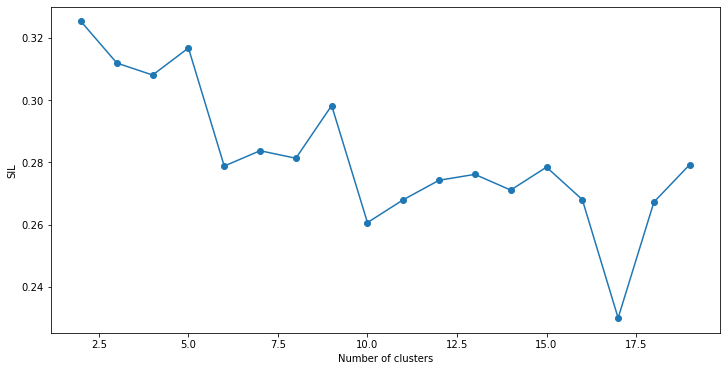

In [213]:
frame = pd.DataFrame({'K':range(2,20), 'SIL':sil})
plt.figure(figsize=(12,6))
plt.plot(frame['K'], frame['SIL'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SIL')
plt.show()

In [214]:
kmeans_final1 = KMeans(n_clusters = 5, init='k-means++')
    

In [215]:
kmeans_final1.fit(Airlines_scale_sol)

KMeans(n_clusters=5)

In [216]:
Airlines_scale

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1


In [219]:
prediict=kmeans_final1.predict(Airlines_scale_sol)

In [221]:
Airlines_scale_sol["cluster"]=prediict

In [222]:
Airlines_scale_sol

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,2
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,2
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,2
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,2
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,2
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,2
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,2
